In [124]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Dataset Loading


In [125]:
#Intitializing the dataset file path
Dataset_filepath = "./DS/"
dataset = []
# Reading the each file in dataset and assigning appropriate class to it
for file in os.listdir(Dataset_filepath):
    if(file[0:4]== "Abdo"):
        class_label = 0
    elif(file[0:4]=="Ches"):
        class_label = 1
    elif(file[0:4]=="Head"):
        class_label = 2
  # Coverting images into grayscale using cv2        
    gray_img = cv2.imread(Dataset_filepath+file,cv2.IMREAD_GRAYSCALE) 
  # reshaping an image from 64*64 to 32*32
    reshaped_img = cv2.resize(gray_img,(32,32))
    dataset.append([reshaped_img,class_label])


In [126]:
#displays total lenth of the dataset
len(dataset)

1500

In [127]:
#displays first variable in dataset with appropriate label
dataset[0]

[array([[126, 126, 126, ..., 126, 126, 126],
        [126, 126, 126, ..., 126, 126, 126],
        [126, 126, 126, ..., 126, 126, 126],
        ...,
        [126, 126, 126, ..., 126, 126, 126],
        [126, 126, 126, ..., 126, 126, 126],
        [126, 126, 126, ..., 126, 126, 126]], dtype=uint8), 1]

In [128]:
#Data is shuffled in dataset using random function
#import random library
import random as rand
rand.shuffle(dataset)



#Performing Data-Preprocessing

In [129]:
# Splitting the dataset into features and class-labels
#Intitializing two empty dataset arrays, one is for storing features and other one is for storing labels
Dataset_features = []
Dataset_labels = []
for i,j in dataset:
  Dataset_features.append(i)
  Dataset_labels.append(j)
  


In [130]:
#Displaying length of feature dataset and labels dataset
print(len(Dataset_features))
print(len(Dataset_labels))


1500
1500


In [131]:
#converting features dataset to numpy array
Dataset_features_np=np.reshape(np.array(Dataset_features),(-1,32,32,1))

In [132]:
from sklearn.model_selection import train_test_split
#Spliting data into 80% for training & 20% for testing
X_train_CNN, X_test_CNN, y_train, y_test = train_test_split(Dataset_features_np, Dataset_labels, test_size= 0.2, random_state=32)

In [133]:
#Display shape of data
Dataset_features_np.shape

(1500, 32, 32, 1)

In [134]:
#Display shape of training and testing data
X_train_CNN.shape, X_test_CNN.shape

((1200, 32, 32, 1), (300, 32, 32, 1))

# Applying Feature Scaling

In [135]:
#It outputs maximum X value from feature Dataset
X_valuemax = np.amax(Dataset_features_np)
print(X_valuemax)

255


In [136]:
# Coverting all the values in x training and testing dataset to range between 0 and 1 by dividing each 
# and every value by maximum value
X_train_CNN = X_train_CNN.astype('float32')/X_valuemax
X_test_CNN  = X_test_CNN.astype('float32')/X_valuemax

#Designing Convolution Neural Network (CNN) Model


In [137]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [138]:
# Create the model
model = Sequential()
# Add first Convolution layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Add second convolution layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#Add flatten layer
model.add(Flatten())
#Add dense layer
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [139]:
# Gives model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)             

#Feature Extraction from Intermediate Dense Layer

In [140]:
#The cnn model used here ectract the features from the output of the dense layer
cnn_model = keras.Model(inputs = model.inputs,
                outputs = [model.layers[7].output])

In [141]:
#coverting the extracted features into numpy array
feature_ext_train = np.array(cnn_model(X_train_CNN))
feature_ext_test = np.array(cnn_model(X_test_CNN))

#Designing K-Nearest Neighbour (KNN) Model
Applying KNN algorthim for the extracted features from CNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Specifing the k-nearest neighbours
near_neigh = [3,5,7,9]
# We can create Python dictionary using [] or dict()
scores = []
# We use a loop through the range for every k value
# We append the accuracy scores in the dictionary
for k in near_neigh:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(feature_ext_train, y_train)
    y_prediction = knn.predict(feature_ext_test)
    ac_s= metrics.accuracy_score(y_test, y_prediction)
    print("k = ",k,",accuracy_score =",ac_s)
    print("The k Value is:",k)
    print(classification_report(y_test,y_prediction))
    print("The confusion matrix is : ")
    print(confusion_matrix(y_test,y_prediction))
    scores.append(metrics.accuracy_score(y_test, y_prediction))
print("Accuracy scores of all k vales")
print(scores)

k =  3 ,accuracy_score = 1.0
The k Value is: 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        98

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

The confusion matrix is : 
[[ 97   0   0]
 [  0 105   0]
 [  0   0  98]]
k =  5 ,accuracy_score = 0.99
The k Value is: 5
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1       0.98      1.00      0.99       105
           2       1.00      0.99      0.99        98

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

The confusion matrix is : 
[[ 95   2   0]
 [  0 105   0]
 [  1   0  97

Text(0, 0.5, ' Accuracy')

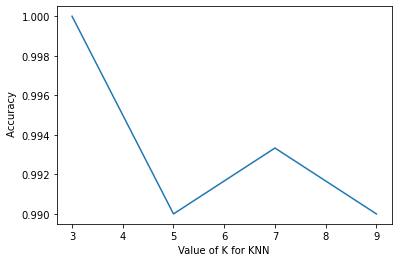

In [143]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and accuracy
# plt.plot(x_axis, y_axis)
plt.plot(near_neigh, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel(' Accuracy')

In [144]:
#save the model in pickel
#Knn model resulted best accuracy at k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(feature_ext_train, y_train)
y_prediction = knn.predict(feature_ext_test)
import pickle    
# now you can save it to a file
with open('1116540-kNN.pkl', 'wb') as f:
    pickle.dump(knn, f)

#Creating Random Forest Model
Applying random forest model for the extacted features from CNN

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Creating a base model
ran_forc = RandomForestClassifier(n_estimators = 100,min_samples_split=2,max_depth = 2,random_state=0)
ran_forc.fit(feature_ext_train, y_train)
prediction_y = ran_forc.predict(feature_ext_test)

# Accuracy and confusion matrix for the base model
print("The Confusion-matrix is : " )
print(confusion_matrix(y_test,prediction_y))
print(classification_report(y_test,prediction_y))
acc = accuracy_score(y_test,prediction_y)
print("The Accuracy Score is: ",acc )

The Confusion-matrix is : 
[[90  5  2]
 [ 6 99  0]
 [ 3  0 95]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        97
           1       0.95      0.94      0.95       105
           2       0.98      0.97      0.97        98

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

The Accuracy Score is:  0.9466666666666667


#Tuning hyperparameters using randomized search

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [10,20,30,40,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7,9, 10]
# Maximum depth
max_depth = [2,4,6,8,10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth': max_depth}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10],
 'min_samples_split': [2, 5, 7, 9, 10],
 'n_estimators': [10, 20, 30, 40, 50]}


In [155]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters using randomized search 
rf_random = RandomizedSearchCV(estimator = ran_forc, param_distributions = random_grid, n_iter = 10,random_state=42)
# Fit the random search model
rf_random.fit(feature_ext_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=8,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=9,
                                                    min_weight_fraction_leaf=0.0,
               

In [149]:
#it displays best parameters
rf_random.best_params_

{'max_depth': 8, 'min_samples_split': 9, 'n_estimators': 20}

In [151]:
#substituting the best parameters into base modle and calculting performance metrics
ran_forc = RandomForestClassifier(n_estimators = 20,max_depth=8, min_samples_split=9,random_state=0)
ran_forc.fit(feature_ext_train, y_train)
prediction_y = ran_forc.predict(feature_ext_test)

# Accuracy and confusion matrix for the base model
print("The Confusion-matrix is : " )
print(confusion_matrix(y_test,prediction_y))
print(classification_report(y_test,prediction_y))
acc = accuracy_score(y_test,prediction_y)
print("The Accuracy Score is: ",acc )

The Confusion-matrix is : 
[[ 96   1   0]
 [  2 103   0]
 [  0   0  98]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        97
           1       0.99      0.98      0.99       105
           2       1.00      1.00      1.00        98

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

The Accuracy Score is:  0.99


In [152]:
import pickle    
# now you can save it to a file
with open('1116540-RF.pkl', 'wb') as f:
    pickle.dump(ran_forc, f)